<h1>System-size dependence of electrolyte activities</h1>

Jeff Thompson (<a href=mailto:jeff.thompson@utexas.edu>jeff.thompson@utexas.edu</a>)

<h2>Introduction</h2>

The purpose of this notebook is to illustrate a finite-size correction scheme for electrolyte chemical potentials computed from molecular simulations.[<sup>1</sup>](#fn1) The scheme is based on the observation that for an $L\times L \times L$ periodic box containing a *finite* density of free charges, the correction to the excess chemical potential of $\nu \ge 1$ test particles behaves in the Debye&ndash;Hückel limit as
$$
\mu^\text{ex}_{\alpha_1\dots\alpha_\nu}(\infty) - \mu^\text{ex}_{\alpha_1\dots\alpha_\nu}(L) \sim - \frac{\bar{\xi}(\lambda_\text{D}/L)}{8\pi \varepsilon L} \sum_{j=1}^\nu  q_{\alpha_j}^2 .
$$
Here $\lambda_\text{D}$ is the Debye length associated with the free-charge density, $\varepsilon$ is the permittivity of the medium (e.g., continuum solvent) in which the free charges move, $q_{\alpha}$ is the charge of species $\alpha$, and $\bar{\xi}(\lambda)$ is the Madelung constant given by[<sup>2</sup>](#fn2)
$$
\bar{\xi}(\lambda) = \sum_{\mathbf{n} \in \mathbb{Z}^3 \setminus\{\mathbf{0}\}} \frac{\mathrm{e}^{-\lvert\mathbf{n}\rvert/\lambda}}{\lvert \mathbf{n}\rvert} - 4\pi \lambda^2.
$$
Note that it has been assumed that the excess chemical potential $\mu^\text{ex}_{\alpha_1\dots\alpha_\nu}(L)$ *includes* the contribution due to the self-energy of the test particles plus a uniform background of charge density $-(1/L^3)\sum_{j=1}^\nu q_{\alpha_j}$. Furthermore, it has been assumed that the positions of the test particles are random and distributed uniformly in the box $(0,L)^3$. If instead the test particles are fixed at the points $\mathbf{r}_1,\dots,\mathbf{r}_\nu$, the relation above is modified to
$$
\mu^\text{ex}_{\alpha_1\dots\alpha_\nu}(\infty;\mathbf{r}_1,\dots,\mathbf{r}_\nu) - \mu^\text{ex}_{\alpha_1\dots\alpha_\nu}(L;\mathbf{r}_1,\dots,\mathbf{r}_\nu) \sim - \frac{1}{8\pi \varepsilon L} \sum_{j,k=1}^\nu q_{\alpha_j} q_{\alpha_k} \bar{\xi}\!\left(\frac{\lambda_\text{D}}{L}; \frac{\mathbf{r}_j - \mathbf{r}_k}{L}\right),
$$
where
$$
\bar{\xi}(\lambda; \mathbf{r}) = \sum_{\mathbf{n} \in \mathbb{Z}^3 \setminus\{\mathbf{0}\}} \frac{\mathrm{e}^{-\lvert \mathbf{r} + \mathbf{n}\rvert/\lambda}}{\lvert \mathbf{r} + \mathbf{n}\rvert} - 4\pi \lambda^2.
$$
Since $\bar{\xi}(\lambda;\mathbf{r}) \sim -4\pi\lambda^2$ at small $\lambda$, the corrections here are of order $1/L^3$ as $L$ goes to infinity at any given $\lambda_\text{D}<\infty$.

In the context of electrolyte solutions, the density of free charges is commonly characterized by the molar ionic strength
$$
I = \tfrac{1}{2} \sum_{\alpha} c_\alpha \left( \frac{q_\alpha}{e} \right)^2.
$$
Here $c_\alpha$ is the molar concentration of species $\alpha$, and $e$ is the elementary charge. The Debye length is defined by
$$
\lambda_{\text{D}} = \left( \frac{2 e^2 N_\text{A} I}{\varepsilon k_\text{B} T }\right)^{-1/2},
$$
where $N_\text{A}$ is the Avogadro constant, $k_\text{B}$ is the Boltzmann constant, and $T$ is the temperature. The asymptotic finite-size correction above is obtained by considering a limit in which $I$ tends to zero while the dimensionless ratio $\lambda_\text{D}/L$ remains fixed and small. One may expect it to be a reasonably good approximation of the actual finite-size correction when we are close to this limit. "Close" means roughly that[<sup>3</sup>](#fn3)
$$
N_\text{A} I \lambda_\text{D}^3 \gg 1, \quad N_\text{A} I \sigma^3 \ll 1,
$$
where $\sigma$ is a length at which short-range interactions between ions become important (e.g., the typical diameter of a solvated ion). The first condition says that the number of ions inside a Debye sphere&mdash;the Debye number&mdash;is large. The second says that the precise form of the stabilizing short-range interactions is unimportant. The first condition may also be stated as $\lambda_\text{B}/\lambda_{\text{D}} \ll 1$, where $\lambda_\text{B} = e^2 /(4\pi\varepsilon k_\text{B} T)$ is the Bjerrum length.

The importance of the dimensionless ratio $\lambda_\text{D}/L$ can be seen by considering the relative error 
$$
\delta \mu^\text{ex}_{\alpha_1\dots\alpha_\nu}(L) = \frac{\mu^\text{ex}_{\alpha_1\dots\alpha_\nu}(L) - \mu^\text{ex}_{\alpha_1\dots\alpha_\nu}(\infty)}{\mu^\text{ex}_{\alpha_1\dots\alpha_\nu}(\infty)}.
$$
In the Debye&ndash;Hückel limit, this quantity behaves as
$$
\delta \mu^\text{ex}_{\alpha_1\dots\alpha_\nu}(L) \sim - \frac{\lambda_\text{D}}{L}\bar{\xi}\!\left(\frac{\lambda_\text{D}}{L}  \right).
$$
Hence, close to the Debye&ndash;Hückel limit, the relative error may be kept roughly constant by keeping $\lambda_\text{D}/L$ fixed.
This has implications for the computational feasibility of explicit-solvent simulations at low ionic strength, since fixing $\lambda_\text{D}/L$ means that at given solvent density $N_\text{solv}/L^3$, the number of solvent particles $N_\text{solv}$ must scale as $I^{-3/2}$.

<hr/>

<sup>1</sup> <span id="fn1">This scheme was hinted at in a paper I wrote with my PhD advisor several years ago [J. P. Thompson and I. C. Sanchez, J. Chem. Phys. <b>145</b>, 214103 (2016)]. My ideas there were sketchy and were presented in a form that, I would argue, fell short of being useful to the molecular simulation community. My goal here is to take a step toward generalizing and clarifying the ideas of that paper.</span>

<sup>2</sup> <span id="fn2">The notation $\bar{\xi}$ is adapted from J. M. Caillol and D. Gilles, J. Stat. Phys. <b>100</b>, 905 (2000), Sec. IIIB.2. Note that $\lim_{\lambda\to\infty}\bar{\xi}(\lambda) = \xi \approx -2.837\,297$.</span>

<sup>3</sup> <span id="fn3">See for instance D. C. Brydges and Ph. A. Martin, J. Stat. Phys. <b>96</b>, 1163 (1999), Sec. IIB.</span>

<h2>Numerical example: 1:1 electrolyte</h2>

As an illustration, let us apply the approximate correction formula
$$
\mu(\infty) \approx \mu(L) -\frac{e^2 \bar{\xi}(\lambda_\text{D}/L)}{4\pi\varepsilon L} \equiv \mu(L) + \Delta \mu^\text{DH}(L)
$$
to the "mdc" (MD with conducting boundary conditions) simulation data of Young and Panagiotopoulos [J. Phys. Chem. B, **122**, 3330 (2018)]. Here $\mu(L)$ is the chemical potential of a model 1:1 electrolyte in an implicit solvent of relative permittivity $\varepsilon/\varepsilon_0=73$ at temperature $T=298.15~\text{K}$. The excess part $\mu^\text{ex}(L)$ is defined for a given molar concentration $c$ by the central difference
\begin{gather*}
\mu^{\text{ex}}(L) = F^\text{ex}(L, N(L) + \tfrac{1}{2}) - F^\text{ex}(L, N(L) - \tfrac{1}{2}), 
\end{gather*}
where $N(L) = L^3N_\text{A}c$ is a half-integer, and $F^\text{ex}(L,N)$ is the excess Helmholtz free energy of $N$ neutral ion pairs in a box of side $L$. The ideal part $\mu(L) - \mu^\text{ex}(L) = 2k_\text{B}T \ln (\Lambda^3N_\text{A}c)$ is independent of $L$.

**Note:** It was assumed in the Introduction that the $\nu$ "tagged" particles were additional test particles, external to our system. In this picture, the excess chemical potential of the tagged particles is given by the forward difference
$$
\mu^\text{ex}_{\alpha_1\dots\alpha_\nu}(L) =  F^\text{ex}(L, N(L) + \delta)- F^\text{ex}(L,N(L)),
$$
where $N(L)$ and $\delta$ are lists with elements
$$
N_\alpha(L) = L^3 N_\text{A} c_\alpha, \quad \delta_{\alpha} = \sum_{j=1}^\nu \delta_{\alpha,\alpha_j},
$$
and $F^\text{ex}(L,N)$ is the excess Helmholtz free energy for a system with particle numbers specfied by the list $N$. ($\delta_{\alpha,\beta}$ is the Kronecker delta.) 

Note that in the limit $I\to 0$ with $\lambda_\text{D}/L$ fixed and small, the particle numbers $N_\alpha(L)$ tend to infinity and 
$$
F^\text{ex}(L, N(L)+\delta)- F^\text{ex}(L,N(L)) \sim F^\text{ex}(L,N(L))- F^\text{ex}(L,N(L)-\delta).
$$
Thus, from the perspective of our approximate correction scheme, it does not matter whether the chemical potential is defined by a forward difference or by a backward difference (or in other words, whether the tagged particles are treated as external to or as belonging to the system). Also allowed are intermediate differences of form
$$
F^\text{ex}(L, N(L) + \delta - a\delta)- F^\text{ex}(L,N(L)- a\delta),\quad 0 \le a \le 1.
$$
Young and Panagiotopoulos, for example, use a central difference with $a = \tfrac{1}{2}$.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import the function `ewald.madelung`, which computes the Madelung constant $\bar{\xi}(\lambda)$:

In [3]:
from ewald import madelung

Define physical constants, system parameters:

In [4]:
k_boltzmann = 0.00831446261815324 # mol/(kJ*K)
k_coulomb = 138.9354576 # kJ/(mol*nm)
avogadro_constant = 0.602214076 # 1/yoctomol

In [5]:
relative_permittivity = 73
temperature = 298.15
bjerrum_length = k_coulomb / (relative_permittivity * k_boltzmann * temperature)

Read in the mdc dataset:

In [6]:
df = pd.read_csv('yp_2018_mdc.csv')

Plot raw data, $\mu(L)$, and adjusted data, $\mu(L) + \Delta \mu^\text{DH}(L)$:

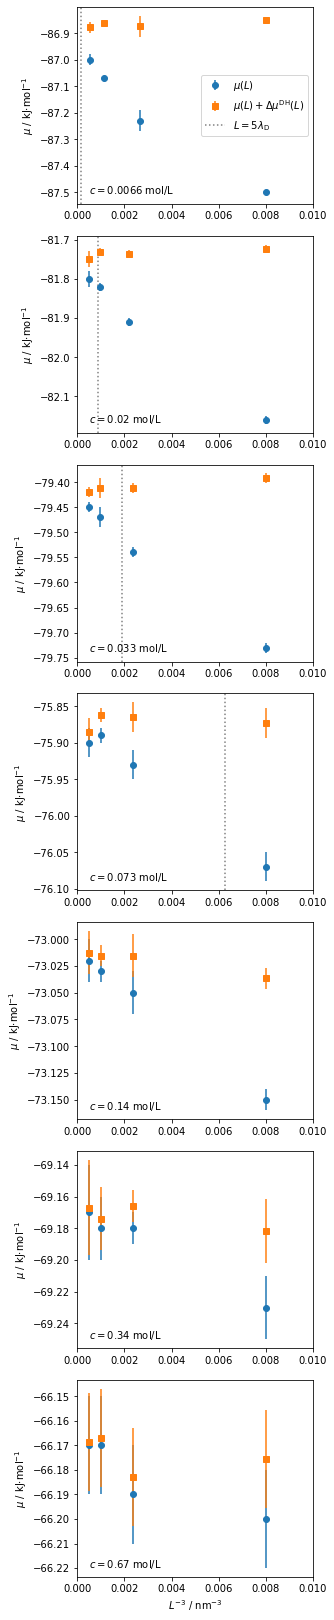

In [7]:
concentration = df['concentration'].unique()
n = len(concentration)

fig, ax = plt.subplots(nrows=n)
fig.set_size_inches(4, n * 3.2)
fig.tight_layout()
ax[-1].set_xlabel('$L^{-3}$ / nm$^{-3}$')

for i in range(n):
    d = df[df['concentration'] == concentration[i]]
    
    debye_length = 1 / np.sqrt(8 * np.pi * bjerrum_length * avogadro_constant * concentration[i])
    
    correction = np.array([-bjerrum_length * madelung(screening_length=debye_length/L) / L for L in d['box_length']])
    correction *= k_boltzmann * temperature # convert to kJ/mol
    
    ax[i].set_ylabel('$\mu$ / kJ$\cdot$mol$^{-1}$')
    ax[i].set_xlim(0, 0.01)
    ax[i].annotate('$c = $' + str(concentration[i]) + ' mol/L', xy=(0.05, 0.05), xycoords='axes fraction')
    h1 = ax[i].errorbar(1 / d['box_length']**3, d['chemical_potential'],              yerr=d['uncertainty'], fmt='o')
    h2 = ax[i].errorbar(1 / d['box_length']**3, d['chemical_potential'] + correction, yerr=d['uncertainty'], fmt='s')
    h3 = ax[i].axvline(1 / (5 * debye_length)**3, color='gray', linestyle=':')
    if i == 0:
        ax[i].legend((h1, h2, h3), ('$\mu(L)$', '$\mu(L) + \Delta \mu^\mathrm{DH}(L)$', '$L=5\lambda_\mathrm{D}$'), 
                     loc='center right')

The gray dotted line, plotted for reference, corresponds to a box length $L=5\lambda_\text{D}$. As shown in the plot below, this box size yields a limiting relative error in the excess chemical potential of
$$
\delta \mu^\text{ex}(L) \sim -\frac{\lambda_\text{D}}{L}\bar{\xi}\!\left( \frac{\lambda_\text{D}}{L} \right) \approx 9\%.
$$
(As pointed out by Liang, Xu, and Xing [New J. Phys. **17**, 83062 (2015)], obtaining a relative error of less than 1% requires $L > 10\lambda_\text{D}$.) Note that $-\lambda\bar{\xi}(\lambda) \sim 4\pi\lambda^3$ as $\lambda\to 0$, and 
$$
\frac{-\lambda\bar{\xi}(\lambda) - 4\pi\lambda^3}{4\pi\lambda^3} \approx 0.1 \quad\text{when }\lambda = \tfrac{1}{5}.
$$
So we can think of $L = 5\lambda_\text{D}$ as providing a rough estimate of where effects due to periodic images become important.

Plot $-\lambda\bar{\xi}(\lambda)$ and its small-$\lambda$ asymptote $4\pi\lambda^3$ as a function of the reduced screening length $\lambda$:

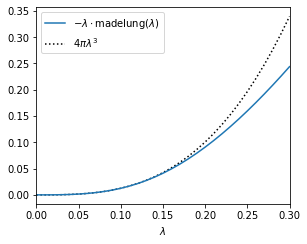

In [13]:
screening_length = np.arange(0, 0.31, 0.01)
relative_error = np.array([-l*madelung(l) for l in screening_length])
fig, ax = plt.subplots()
fig.tight_layout()
fig.set_size_inches(4, 3.2)
ax.set_xlabel('$\lambda$')
ax.set_xlim(0, 0.3)
h2, = ax.plot(screening_length, 4*np.pi*screening_length**3, linestyle=':', color='k')
h1, = ax.plot(screening_length, relative_error)
_ = ax.legend((h1, h2), ('$-\lambda \cdot$madelung($\lambda$)', '$4\pi\lambda^3$'))

<h2>Numerical example: 2:1 electrolyte</h2>

Read in implicit-solvent data from Young, Tietz, and Panagiotopoulos [J. Chem. Eng. Data **65**, 337 (2020)]:

In [9]:
df = pd.read_csv('ytp_2020_drvh_implicit.csv')

Plot raw data, $\mu(L)=\mu_{\text{CaCl}_2}(L)$, and adjusted data, $\mu(L) + \Delta \mu^\text{DH}(L)$. Here
$$
\Delta \mu^\text{DH}(L) = -\frac{\bar{\xi}(\lambda_\text{D}/L)}{8\pi\varepsilon L} \left( q_{\text{Ca}^{2+}}^2 + 2 q_{\text{Cl}^-}^2\right) = -\frac{3e^2 \bar{\xi}(\lambda_\text{D}/L)}{4\pi \varepsilon L}.
$$

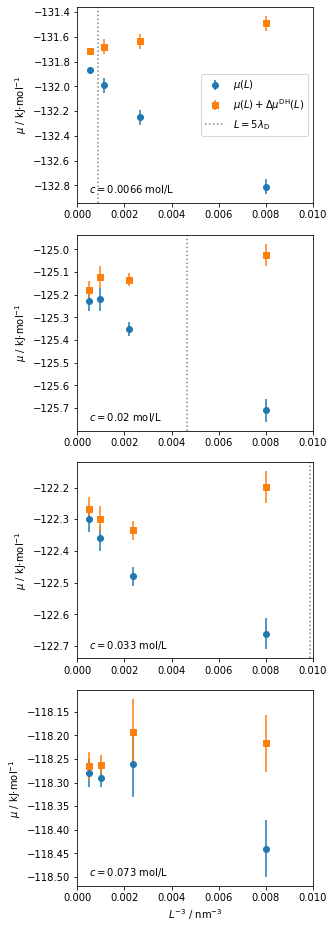

In [10]:
concentration = df['concentration'].unique()
n = len(concentration)

fig, ax = plt.subplots(nrows=n)
fig.set_size_inches(4, n * 3.2)
fig.tight_layout()
ax[-1].set_xlabel('$L^{-3}$ / nm$^{-3}$')

for i in range(n):
    d = df[df['concentration'] == concentration[i]]
    
    ionic_strength = 3 * concentration[i] # 2:1 salt
    debye_length = 1 / np.sqrt(8 * np.pi * bjerrum_length * avogadro_constant * ionic_strength)
    
    correction = np.array([-3 * bjerrum_length * madelung(screening_length=debye_length/L) / L 
                           for L in d['box_length']])
    correction *= k_boltzmann * temperature # convert to kJ/mol
    
    ax[i].set_ylabel('$\mu$ / kJ$\cdot$mol$^{-1}$')
    ax[i].set_xlim(0, 0.01)
    ax[i].annotate('$c = $' + str(concentration[i]) + ' mol/L', xy=(0.05, 0.05), xycoords='axes fraction')
    h1 = ax[i].errorbar(1 / d['box_length']**3, d['chemical_potential'],              yerr=d['uncertainty'], fmt='o')
    h2 = ax[i].errorbar(1 / d['box_length']**3, d['chemical_potential'] + correction, yerr=d['uncertainty'], fmt='s')
    h3 = ax[i].axvline(1 / (5 * debye_length)**3, color='gray', linestyle=':')
    if i == 0:
        ax[i].legend((h1, h2, h3), ('$\mu(L)$', '$\mu(L) + \Delta \mu^\mathrm{DH}(L)$', '$L=5\lambda_\mathrm{D}$'), 
                     loc='center right')